In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1

In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
trans = ["airplane", "automobile", "bird",
         "cat", "deer", "dog", "frog",
         "horse", "ship", "truck"]

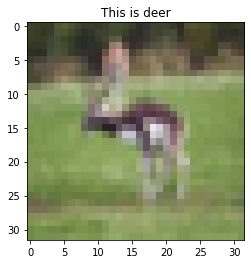

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.title("This is " + trans[y_train[c][0]])
plt.imshow(x_train[c])

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten, Dense, Dropout

cnn = Sequential()
# 1792: 3(長) * 3(寬) * 3(層數) * 64(個) +64(bias)

cnn.add(Conv2D(64, (3, 3),
               padding="same",
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPool2D())
# 73856: 3 * 3 * 64 * 128(個) +128(bias)
cnn.add(Conv2D(128, (3, 3),
               padding="same",
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPool2D())

cnn.add(Conv2D(256, (3, 3),
               padding="same",
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPool2D())


cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))

# 防止過度依賴某一特徵
cnn.add(Dropout(0.25))

cnn.add(Dense(10, activation="softmax"))


cnn.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         


In [7]:
# 資料預處理
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [8]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原來:", y_train[0])
print("後來:", y_train_cat[0])

原來: [6]
後來: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
cnn.compile(loss="categorical_crossentropy",
           optimizer="adam",
           metrics=["accuracy"])

In [10]:
cnn.fit(x_train_norm, y_train_cat,
       batch_size=200, epochs=10,
       validation_split=0.1,
        verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 80s - loss: 1.5824 - acc: 0.4211 - val_loss: 1.2468 - val_acc: 0.5528
Epoch 2/10
 - 79s - loss: 1.1199 - acc: 0.6015 - val_loss: 0.9545 - val_acc: 0.6588
Epoch 3/10
 - 78s - loss: 0.8969 - acc: 0.6855 - val_loss: 0.8279 - val_acc: 0.7156
Epoch 4/10
 - 78s - loss: 0.7728 - acc: 0.7287 - val_loss: 0.7670 - val_acc: 0.7382
Epoch 5/10
 - 77s - loss: 0.6661 - acc: 0.7678 - val_loss: 0.7326 - val_acc: 0.7552
Epoch 6/10
 - 77s - loss: 0.5756 - acc: 0.8003 - val_loss: 0.7126 - val_acc: 0.7558
Epoch 7/10
 - 77s - loss: 0.4937 - acc: 0.8279 - val_loss: 0.6581 - val_acc: 0.7846
Epoch 8/10
 - 77s - loss: 0.4225 - acc: 0.8519 - val_loss: 0.6897 - val_acc: 0.7752
Epoch 9/10
 - 77s - loss: 0.3540 - acc: 0.8762 - val_loss: 0.7120 - val_acc: 0.7694
Epoch 10/10
 - 77s - loss: 0.2922 - acc: 0.8969 - val_loss: 0.6969 - val_acc: 0.7812


In [11]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 5s 489us/step


[0.7536321941375732, 0.7699]

In [12]:
from sklearn.metrics import confusion_matrix
import pandas as pd
base = trans
i = [(str(b) + "(原本)") for b in base]
c = [(str(b) + "(預測)") for b in base]

pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(原本),806,17,42,14,17,7,12,10,46,29
automobile(原本),9,882,6,12,3,5,7,4,10,62
bird(原本),49,4,680,50,85,53,46,21,9,3
cat(原本),18,10,59,600,81,140,54,22,5,11
deer(原本),14,2,52,37,805,22,27,31,8,2
dog(原本),15,3,50,168,56,659,16,27,4,2
frog(原本),7,3,42,59,35,20,823,6,2,3
horse(原本),12,2,36,30,68,57,5,783,0,7
ship(原本),48,32,17,16,11,8,9,1,832,26
truck(原本),27,58,13,17,8,11,8,10,19,829


In [27]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

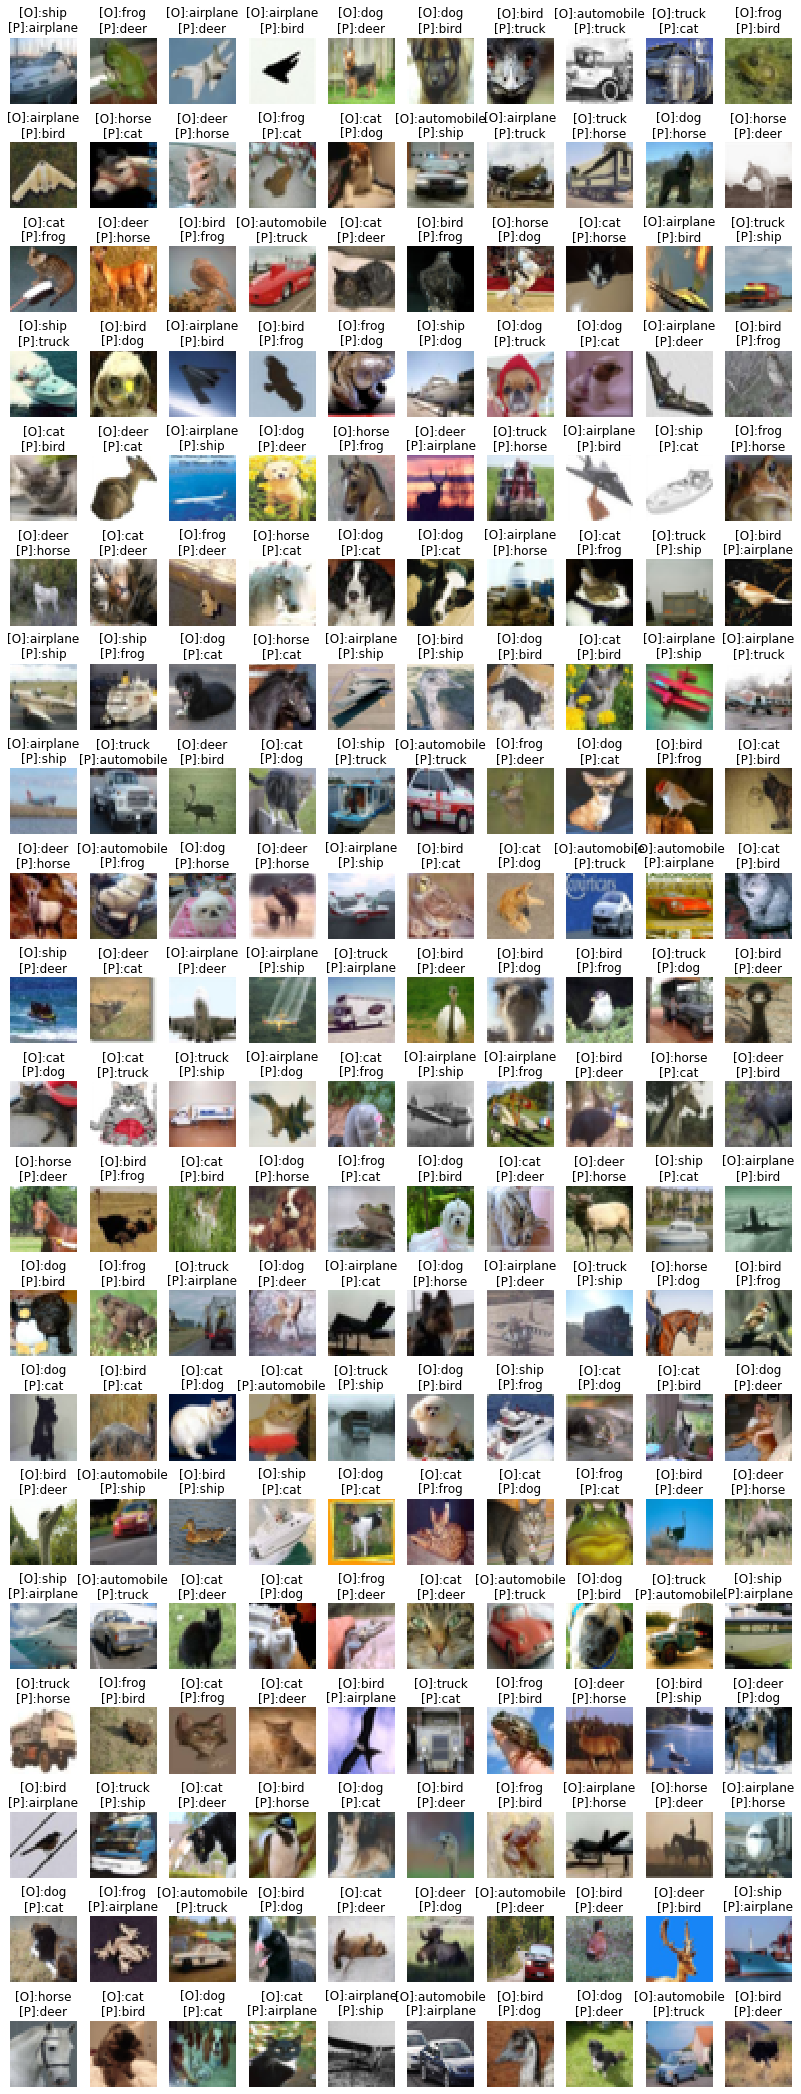

In [28]:
import numpy as np
idx = np.nonzero(pre != y_test.reshape(-1))[0][:200]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤圖片的正確答案
false_answer = y_test.reshape(-1)[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i,img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O]:" + trans[false_answer[i]] + "\n[P]:" + trans[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
cnn.save("cnn.h5")